# Introduction

#### Below we have a dataset where  each entry represents a person who asks for a credit from a bank. 
#### Each person  risk is classified as good or bad  according to the set of attributes.

In [1]:
import pandas as pd 
df = pd.read_csv("~/Desktop/CC_Approvals/german_credit_data.csv",index_col=[0])
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


#### To run a business machine learning project I would advice the IBM Crisp DM frameworks
( https://www.ibm.com/docs/en/spss-modeler/SaaS?topic=dm-crisp-help-overview )
#### The steps of this framework are presented in the picture below 

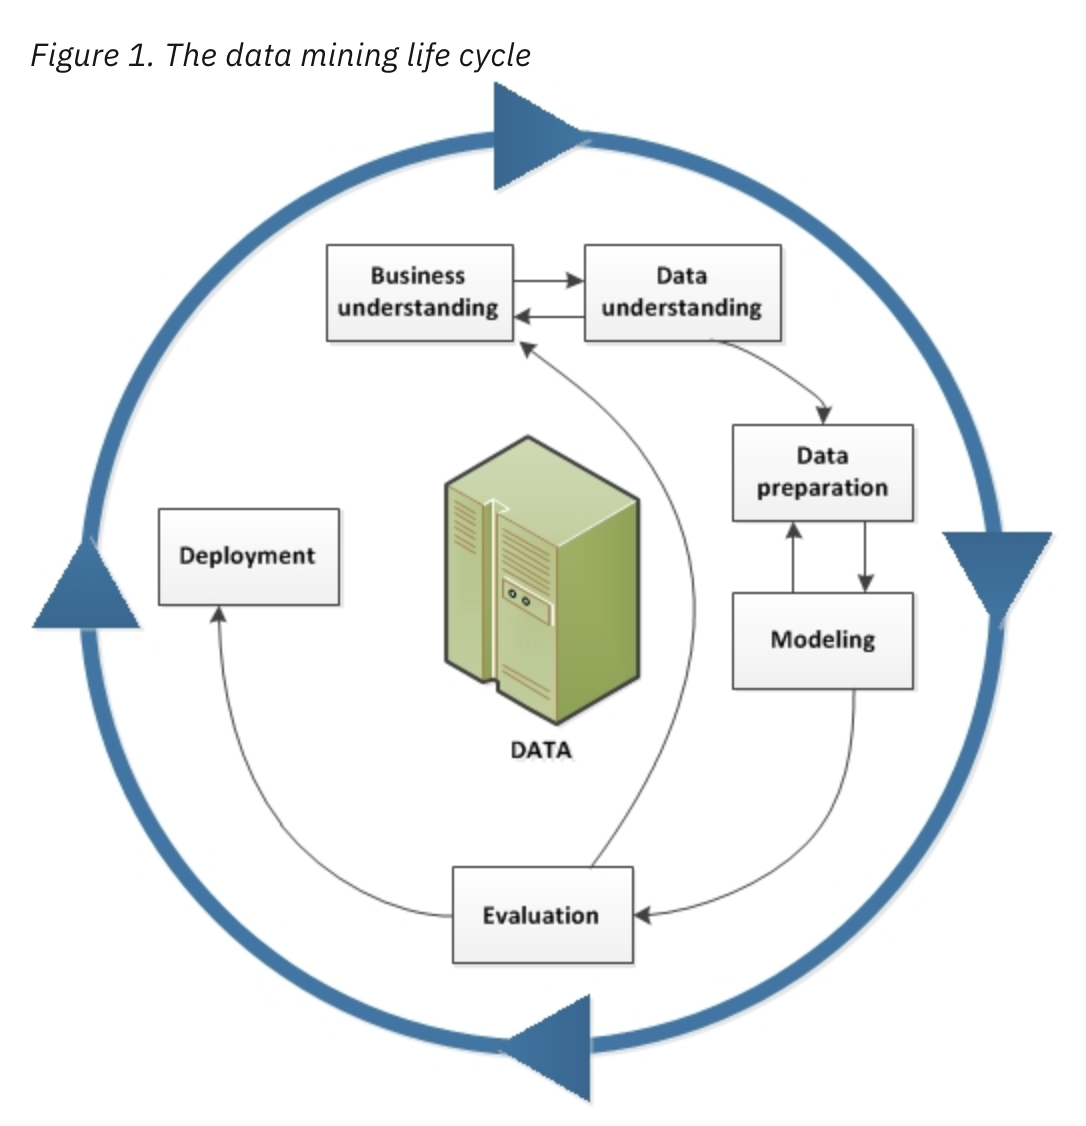

In [2]:
from IPython.display import Image
Image(filename="/Users/brahamyoussef/Desktop/Screenshot.png", width=500)

# Business understanding 

#### We will use the datasets to build multiple machine learning models ( logistic regression, KNN, Naive baises etc.) to predict if the credit risk.
#### We will evaluate the models, select the models that scores the best and tune the models parameters to improve our predictions


### Importing  librarys

In [3]:
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

In [4]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score # to split the data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score #To evaluate our model
from sklearn.model_selection import GridSearchCV
# Algorithmns models to be compared
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [5]:
from sklearn.utils import resample
from sklearn.metrics import roc_curve

In [6]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [7]:
df = pd.read_csv("~/Desktop/CC_Approvals/german_credit_data.csv",index_col=[0])

# Data Understanding

In [8]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [10]:
df['Saving accounts'] = df['Saving accounts'].fillna('no_inf')
df['Checking account'] = df['Checking account'].fillna('no_inf')
#Let categorize ages
interval = (18, 25, 35, 60, 120)
cats = ['Student', 'Young', 'Adult', 'Senior']
df["Age_cat"] = pd.cut(df.Age, interval, labels=cats)

In [11]:
print(df.nunique())
#Looking the data
print("Purpose : ",df.Purpose.unique())
print("Sex : ",df.Sex.unique())
print("Housing : ",df.Housing.unique())
print("Saving accounts : ",df['Saving accounts'].unique())
print("Risk : ",df['Risk'].unique())
print("Checking account : ",df['Checking account'].unique())
print("Aget_cat : ",df['Age_cat'].unique())

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       5
Checking account      4
Credit amount       921
Duration             33
Purpose               8
Risk                  2
Age_cat               4
dtype: int64
Purpose :  ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Sex :  ['male' 'female']
Housing :  ['own' 'free' 'rent']
Saving accounts :  ['no_inf' 'little' 'quite rich' 'rich' 'moderate']
Risk :  ['good' 'bad']
Checking account :  ['little' 'moderate' 'no_inf' 'rich']
Aget_cat :  [Senior, Student, Adult, Young]
Categories (4, object): [Student < Young < Adult < Senior]


# Data Preparation

### Creating dummy variables for categorical data

In [12]:
df = df.merge(pd.get_dummies(df.Purpose, drop_first=True, prefix='Purpose'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.Sex, drop_first=True, prefix='Sex'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.Housing, drop_first=True, prefix='Housing'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["Saving accounts"], drop_first=True, prefix='Savings'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df.Risk, prefix='Risk'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["Checking account"], drop_first=True, prefix='Check'), left_index=True, right_index=True)
df = df.merge(pd.get_dummies(df["Age_cat"], drop_first=True, prefix='Age_cat'), left_index=True, right_index=True)


Dummy Variable in Regression Models: 

In statistics, especially in regression models, we deal with various kinds of data. The data may be quantitative (numerical) or qualitative (categorical). The numerical data can be easily handled in regression models but we can’t use categorical data directly, it needs to be transformed in some way. 

In [13]:
del df["Saving accounts"]
del df["Checking account"]
del df["Purpose"]
del df["Sex"]
del df["Housing"]
del df["Age_cat"]
del df["Risk"]
del df['Risk_good']

==> Once we have the dummy variable the we can delete the original columns as they can induce erros in our models

### Checking for correlation

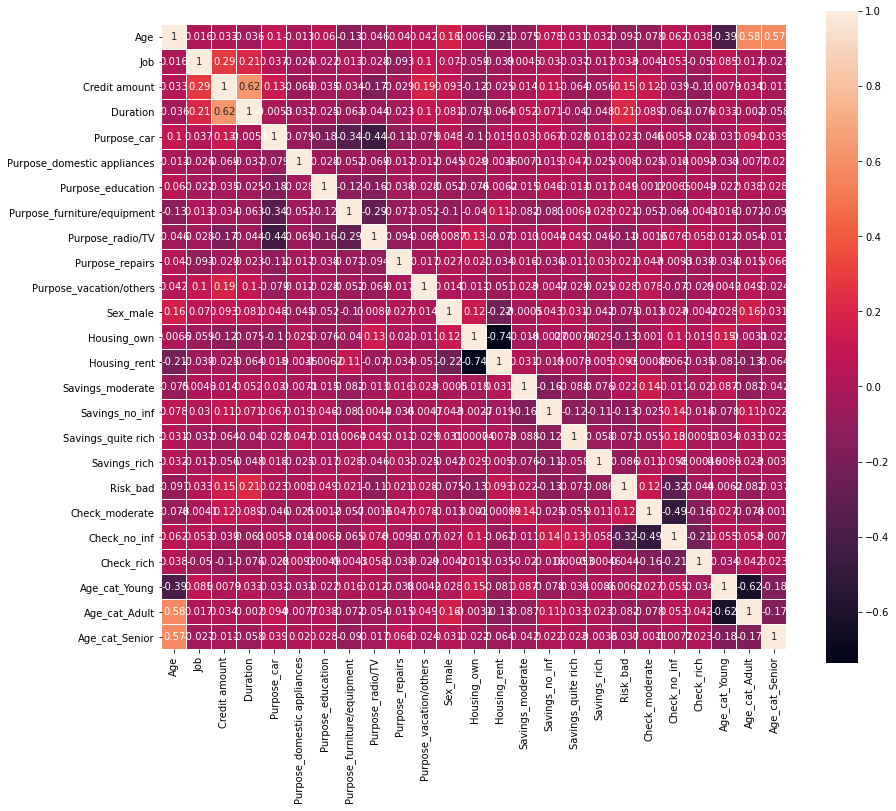

In [14]:
plt.figure(figsize=(14,12))
sns.heatmap(df.astype(float).corr(),linewidths=0.1,vmax=1.0, 
            square=True,  linecolor='white', annot=True)
plt.show()

==> Columns with high correlation can be reducted to an only one to create the model as they doesn't bring additional data.

==> In this  case we don't have columns highly correlated so we keep them all to build our model/

### Smoothing outliers

In [15]:
df['Credit amount'] = np.log(df['Credit amount'])

Log is used when the variables span several orders of magnitude. 
Credit amount is a typical example: 
its distribution is "power law", 
meaning that the vast majority of credit amounts are small and very few are big.

### Splitting the data

In [16]:
X = df.drop('Risk_bad', 1).values
y = df["Risk_bad"].values
# Spliting X and y into train and test version
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=811)


# Modeling

below a list of videos explaining how the models work

In [17]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', XGBClassifier()))

### Explanations: 

LogisticRegression
https://www.youtube.com/watch?v=yIYKR4sgzI8

LinearDiscriminantAnalysis
https://www.youtube.com/watch?v=azXCzI57Yfc

KNeighborsClassifier
https://www.youtube.com/watch?v=HVXime0nQeI

DecisionTreeClassifier
https://www.youtube.com/watch?v=_L39rN6gz7Y&ab_channel=StatQuestwithJoshStarmer

GaussianNB
https://www.youtube.com/watch?v=H3EjCKtlVog

RandomForestClassifier
https://www.youtube.com/watch?v=J4Wdy0Wc_xQ

SVC
https://www.youtube.com/watch?v=efR1C6CvhmE&ab_channel=StatQuestwithJoshStarmer


XGBClassifier
https://www.youtube.com/watch?v=OtD8wVaFm6E&ab_channel=StatQuestwithJoshStarmer

### Runnings the models

In [28]:
#We turn off because the output takes too much spache in the code

#results = []
#names = []
#to_d =[]
#scoring = 'recall'
#for name, model in models:
 #       kfold = KFold(n_splits=10, random_state=seed)
  #      cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
   #     results.append(cv_results)
    #    names.append(name)
     #   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
      #  to_d.append(str(msg))


Cross validation: https://www.youtube.com/watch?v=fSytzGwwBVw


# Evaluation

In [19]:
to_d

['LR: 0.387400 (0.098492)',
 'LDA: 0.440568 (0.096038)',
 'KNN: 0.293712 (0.074298)',
 'CART: 0.484195 (0.068051)',
 'NB: 0.627377 (0.058341)',
 'RF: 0.408591 (0.109195)',
 'SVM: 0.179879 (0.063649)',
 'XGB: 0.475033 (0.132630)']

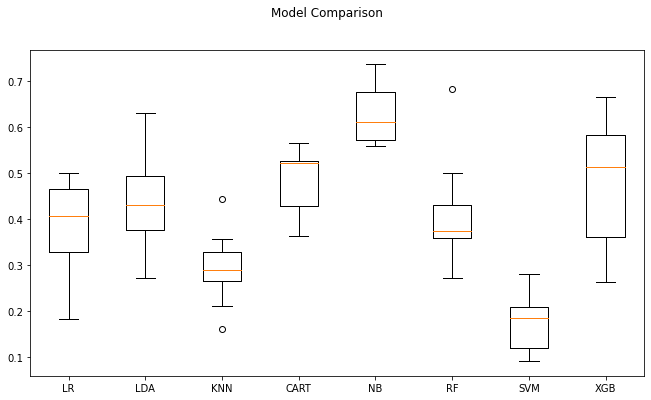

In [20]:
fig = plt.figure(figsize=(11,6))
fig.suptitle('Model Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

==> We can observe that our best results was with CART, NB and XGBoost.
I will implement some models and try to do a simple tunning on them

# Tuning 

## 1. RF - RandomForestClassifier

### Looking for the best paremeters using GridSearch

In [30]:
#We turn off because the output takes too much spache in the code
#Seting the Hyper Parameters
#param_grid = {"max_depth": [3,5, 7, 10,None],
              #"n_estimators":[3,5,10,25,50,150],
              #"max_features": [4,7,15,20]}

#Creating the classifier
#model = RandomForestClassifier(random_state=2)

#grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall', verbose=4)
#grid_search.fit(X_train, y_train)

### Explanation
==> max_depth
The maximum depth of the tree. If None, 
then nodes are expanded until all leaves are pure or until 
all leaves contain less than min_samples_split samples.

==> n_estimators
The number of trees in the forest.

==> max_features 
max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
The number of features to consider when looking for the best split

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier



In [22]:
print('The best paremeters for the random forest model are: ', grid_search.best_params_, 'giving a score of ',grid_search.best_score_)

The best paremeters for the random forest model are:  {'max_depth': 10, 'max_features': 15, 'n_estimators': 5} giving a score of  0.500096618357488


In [23]:
rf = RandomForestClassifier(max_depth=None, max_features=10, n_estimators=15, random_state=2)
#trainning with the best params
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [24]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(fbeta_score(y_test, y_pred, beta=2))
print(classification_report(y_test, y_pred))



0.724
[[154  22]
 [ 47  27]]
0.3913043478260869
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       176
           1       0.55      0.36      0.44        74

    accuracy                           0.72       250
   macro avg       0.66      0.62      0.63       250
weighted avg       0.70      0.72      0.71       250



### Explanation

The F-beta score is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0. The beta parameter determines the weight of recall in the combined score.

Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances.

Recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance.



## 2.  NB - Naive bayesian model with PCA in a pipeline

In [25]:
features = []
features.append(('pca', PCA(n_components=2)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)
# create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', GaussianNB()))
model = Pipeline(estimators)
# evaluate pipeline
seed = 7
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(model, X_train, y_train, cv=kfold)
print(results.mean())

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.7026666666666668


In [26]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))
print(fbeta_score(y_test, y_pred, beta=2))
print(classification_report(y_test, y_pred))


0.66
[[142  34]
 [ 51  23]]
0.3257790368271955
              precision    recall  f1-score   support

           0       0.74      0.81      0.77       176
           1       0.40      0.31      0.35        74

    accuracy                           0.66       250
   macro avg       0.57      0.56      0.56       250
weighted avg       0.64      0.66      0.65       250



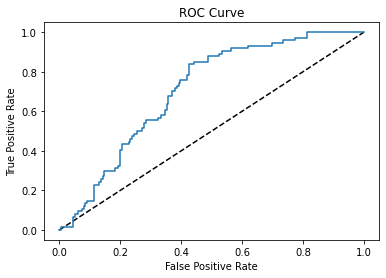

In [27]:
#Predicting proba
y_pred_prob = model.predict_proba(X_test)[:,1]
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### ROC & AUC
https://www.youtube.com/watch?v=H3EjCKtlVog&ab_channel=StatQuestwithJoshStarmer